In [1]:
import os
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import yaml
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# Leggi il file YAML come dizionario
with open(f"config/main.yaml", 'r') as f:
    config = yaml.safe_load(f)

In [3]:
config

{'raw': {'circuits': {'path': 'data/raw/circuits.csv'},
  'constructor_results': {'path': 'data/raw/constructor_results.csv'},
  'constructor_standings': {'path': 'data/raw/constructor_standings.csv'},
  'constructors': {'path': 'data/raw/constructors.csv'},
  'drivers': {'path': 'data/raw/drivers.csv'},
  'driver_standings': {'path': 'data/raw/driver_standings.csv'},
  'lap_times': {'path': 'data/raw/lap_times.csv'},
  'pit_stops': {'path': 'data/raw/pit_stops.csv'},
  'qualifying': {'path': 'data/raw/qualifying.csv'},
  'races': {'path': 'data/raw/races.csv'},
  'results': {'path': 'data/raw/results.csv'},
  'seasons': {'path': 'data/raw/seasons.csv'},
  'sprint_results': {'path': 'data/raw/sprint_results.csv'},
  'status': {'path': 'data/raw/status.csv'}},
 'processed': {'races_grouped': {'path': 'data/processed/races_grouped_13_05_2023.xlsx'},
  'with_lap': {'path': 'data/processed/with_lap.csv'},
  'without_lap': {'path': 'data/processed/without_lap.csv'},
  'df_model': {'path': '

In [4]:
df=pd.read_csv('/Users/cilluzzo/Desktop/Personal/Git/F1/data/processed/with_lap.csv',sep=",",decimal=".")

In [5]:
# Convert the 'date' column to a datetime format
df['date_race'] = pd.to_datetime(df['date_race'], format='%Y/%m/%d')
df['dob_driver'] = pd.to_datetime(df['dob_driver'], format='%Y/%m/%d')
# Calcola i giorni tra la data odierna e la colonna date
def dob_in_days(x):
    return (datetime.datetime.now() - x).days
df['dob_driver'] = df['dob_driver'].apply(dob_in_days)

# Sort the data in descending order by 'date' and 'lap_lap'
df = df.sort_values(by=['date_race', 'lap_lap','position_lap'], ascending=True)

In [6]:
df.columns

Index(['date_race', 'year_race', 'round_race', 'location_circuit',
       'country_circuit', 'driverRef_driver', 'dob_driver',
       'nationality_driver', 'points_driver_st', 'position_driver_st',
       'wins_driver_st', 'number_results', 'grid_results', 'position_results',
       'points_results', 'laps_results', 'milliseconds_results',
       'fastestLap_results', 'rank_results', 'fastestLapTime_results',
       'fastestLapSpeed_results', 'status_status', 'constructorRef_constr',
       'points_contr_res', 'points_constr_std', 'position_constr_std',
       'wins_constr_std', 'nationality_constr', 'number_qualy',
       'position_qualy', 'q1_qualy', 'q2_qualy', 'q3_qualy',
       'resultId_results', 'raceId_results', 'driverId_results',
       'constructorId_results', 'milliseconds_lap', 'lap_lap', 'position_lap'],
      dtype='object')

In [7]:
# Pairwise scatter plot
#sns.pairplot(df)
#plt.show()

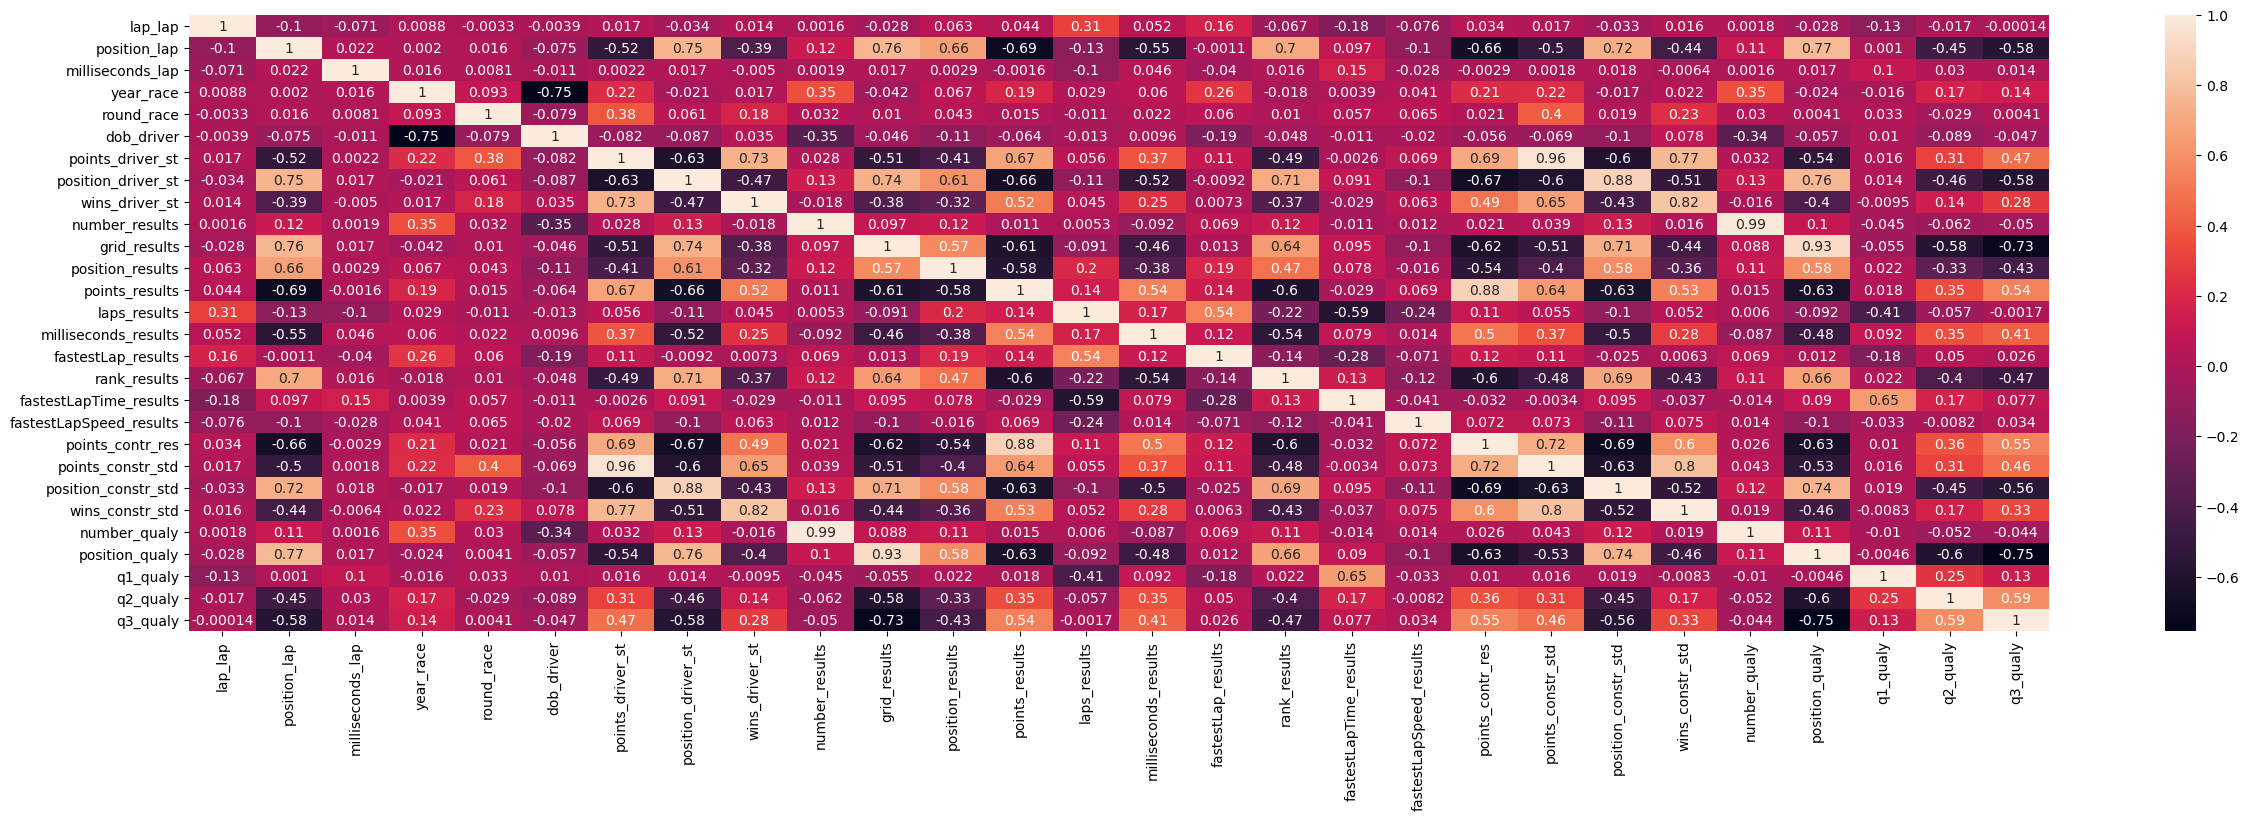

In [8]:
# Correlation matrix heatmap
corr = df[['date_race','lap_lap', 'position_lap','milliseconds_lap',
        'year_race', 'round_race', 'location_circuit',
       'country_circuit', 'driverRef_driver', 'dob_driver',
       'nationality_driver', 'points_driver_st', 'position_driver_st',
       'wins_driver_st', 'number_results', 'grid_results', 'position_results',
       'points_results', 'laps_results', 'milliseconds_results',
       'fastestLap_results', 'rank_results', 'fastestLapTime_results',
       'fastestLapSpeed_results', 'status_status', 'constructorRef_constr',
       'points_contr_res', 'points_constr_std', 'position_constr_std',
       'wins_constr_std', 'nationality_constr', 'number_qualy',
       'position_qualy', 'q1_qualy', 'q2_qualy', 'q3_qualy']].corr()
# imposta la dimensione del plot
fig, ax = plt.subplots(figsize=(30,8))

# crea la heatmap
sns.heatmap(corr, annot=True, ax=ax)


plt.show()

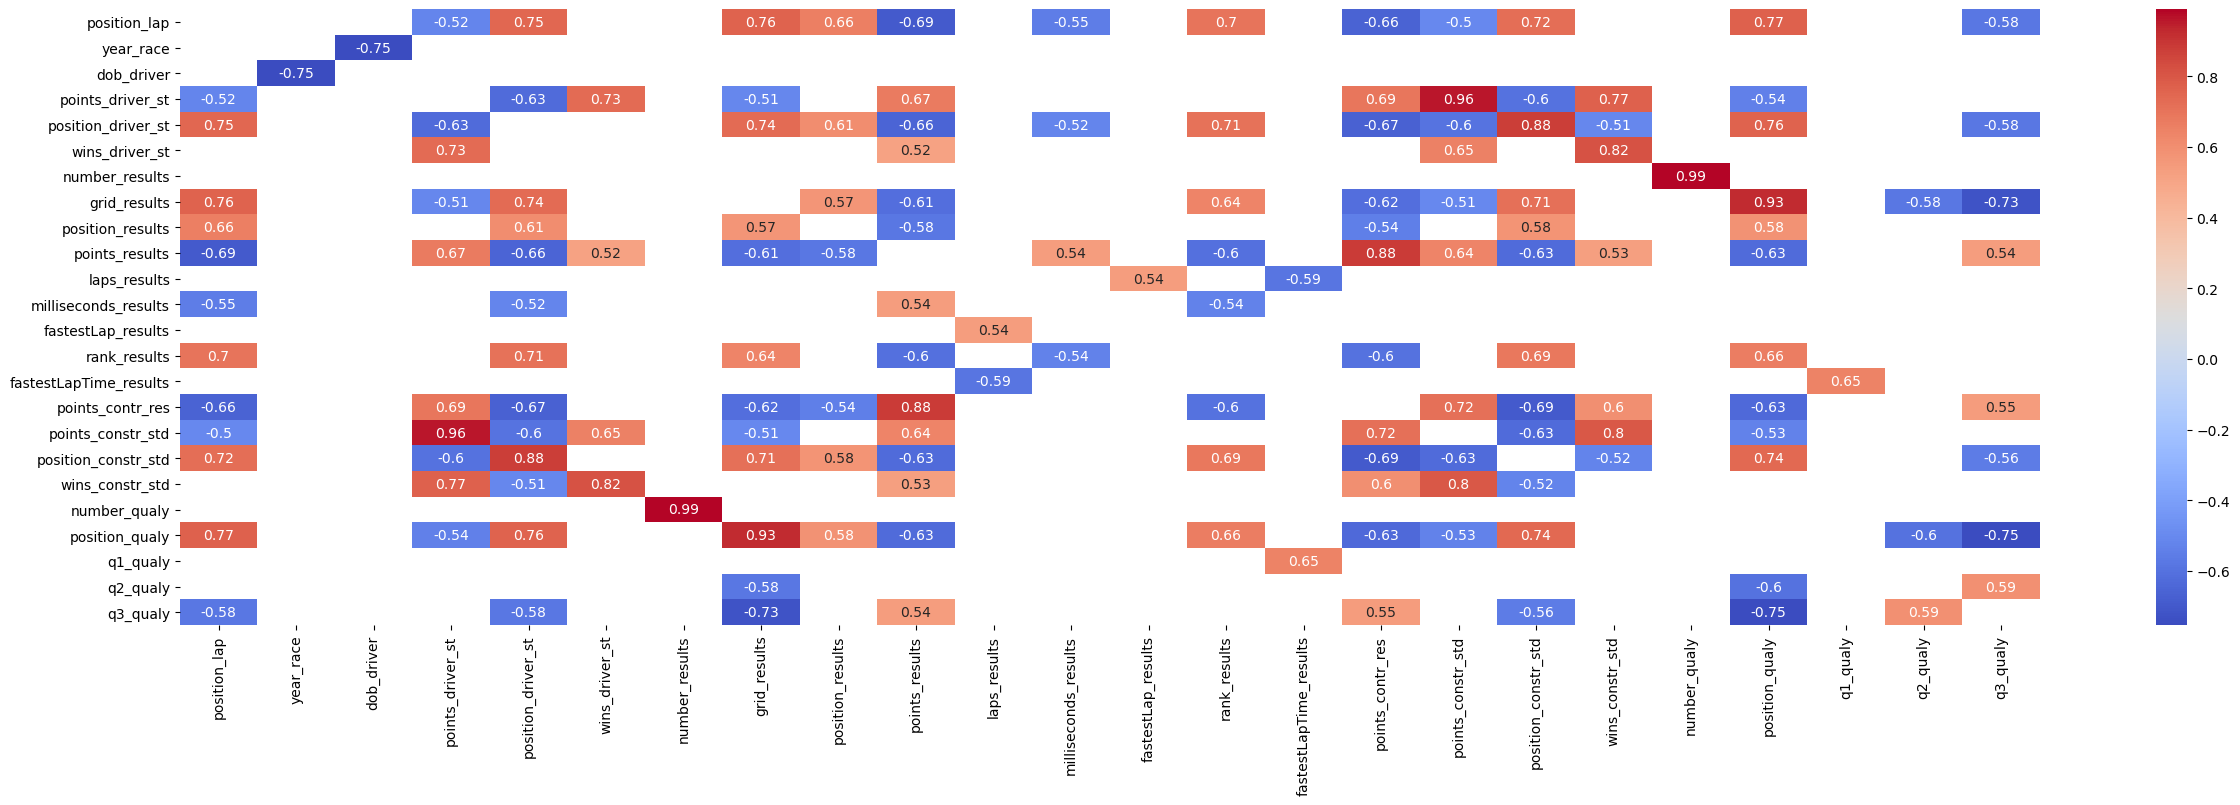

In [9]:
fig, ax = plt.subplots(figsize=(30,8))
# Imposta una soglia di valore assoluto per filtrare le correlazioni
threshold = 0.5

# Filtra le correlazioni che superano la soglia
high_corr = corr[(corr.abs() > threshold) & (corr != 1.0)].dropna(how='all', axis=1).dropna(how='all', axis=0)

# Crea la heatmap con le correlazioni filtrate
sns.heatmap(high_corr, annot=True, cmap='coolwarm',ax=ax)
plt.show()

In [10]:
k = 10 # numero di feature desiderate
target_variable = 'position_lap'
print(corr.nlargest(k+1, target_variable)[target_variable])

position_lap              1.000000
position_qualy            0.770257
grid_results              0.759156
position_driver_st        0.750683
position_constr_std       0.719792
rank_results              0.700016
position_results          0.657761
number_results            0.121122
number_qualy              0.114389
fastestLapTime_results    0.097295
milliseconds_lap          0.022467
Name: position_lap, dtype: float64


In [11]:
k = 10 # numero di feature desiderate
target_variable = 'milliseconds_lap'
print(corr.nlargest(k+1, target_variable)[target_variable])

milliseconds_lap          1.000000
fastestLapTime_results    0.151072
q1_qualy                  0.100996
milliseconds_results      0.045783
q2_qualy                  0.029739
position_lap              0.022467
position_constr_std       0.017938
grid_results              0.017113
position_qualy            0.016989
position_driver_st        0.016873
rank_results              0.016108
Name: milliseconds_lap, dtype: float64


In [13]:
df

,date_race,year_race,round_race,location_circuit,country_circuit,driverRef_driver,dob_driver,nationality_driver,points_driver_st,position_driver_st,...,q1_qualy,q2_qualy,q3_qualy,resultId_results,raceId_results,driverId_results,constructorId_results,milliseconds_lap,lap_lap,position_lap
113794,2004-03-07,2004,1,Melbourne,Australia,michael_schumacher,19858,German,10.0,1.0,...,84408,-1,-1,1515,90,30,6,93122,1,1
113852,2004-03-07,2004,1,Melbourne,Australia,barrichello,18622,Brazilian,8.0,2.0,...,84482,-1,-1,1516,90,22,6,94212,1,2
114149,2004-03-07,2004,1,Melbourne,Australia,alonso,15268,Spanish,6.0,3.0,...,85699,-1,-1,1517,90,4,4,95116,1,3
114207,2004-03-07,2004,1,Melbourne,Australia,button,15825,British,3.0,6.0,...,84998,-1,-1,1520,90,18,16,96239,1,4
114092,2004-03-07,2004,1,Melbourne,Australia,trulli,17841,Italian,2.0,7.0,...,86290,-1,-1,1521,90,15,4,97052,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405121,2022-11-20,2022,22,Abu Dhabi,UAE,ocon,9739,French,92.0,8.0,...,85735,85007,84830,25832,1096,839,214,90021,58,7
405322,2022-11-20,2022,22,Abu Dhabi,UAE,stroll,8967,Canadian,18.0,15.0,...,85741,85359,-1,25833,1096,840,117,91330,58,8
405437,2022-11-20,2022,22,Abu Dhabi,UAE,ricciardo,12374,Australian,37.0,11.0,...,85766,85068,85045,25834,1096,817,1,90856,58,9
405179,2022-11-20,2022,22,Abu Dhabi,UAE,vettel,13103,German,37.0,12.0,...,85523,84974,84961,25835,1096,20,117,90351,58,10


In [38]:
# Iterate over unique values in "data_race" column
for data_race in df["date_race"].unique()[:1]:
    # Filter dataframe by "data_race" value
    data_race_df = df[df["date_race"] == data_race]
    #crea un pivot table
    pivot_df = data_race_df.pivot(index='driverRef_driver', columns='lap_lap', values='milliseconds_lap')
    print(pivot_df.T.head())


driverRef_driver   alonso  barrichello  baumgartner     bruni   button  \
lap_lap                                                                  
1                 95116.0      94212.0     108581.0  106520.0  96239.0   
2                 86382.0      85972.0      94317.0   92028.0  87115.0   
3                 85638.0      85061.0      92439.0   90670.0  86571.0   
4                 85466.0      85107.0      91734.0   91527.0  86417.0   
5                 85510.0      84955.0      91147.0   91719.0  86396.0   

driverRef_driver  coulthard  fisichella  heidfeld     klien     massa  \
lap_lap                                                                 
1                  100369.0    103901.0  104457.0  106954.0  101664.0   
2                   89368.0     91467.0   90046.0   92944.0   89489.0   
3                   88145.0     88781.0   89583.0   90712.0   88049.0   
4                   88195.0     90491.0   90365.0   90280.0   88176.0   
5                   88429.0     90445.0   9

In [39]:
def process_categorical(df, cat_cols, num_cols):
    # One-hot encode categorical columns
    one_hot = pd.get_dummies(df[cat_cols], prefix=cat_cols)
    # Concatenate one-hot encoded categorical columns and numerical columns
    processed = pd.concat([one_hot, df[num_cols]], axis=1)
    return processed

In [40]:
df_train=df[['date_race','lap_lap', 'position_lap','round_race', 'location_circuit', 'driverRef_driver', 'dob_driver',
       'nationality_driver', 'points_driver_st', 'position_driver_st',
       'wins_driver_st', 'number_results', 'grid_results', 'position_results',
       'points_results', 'laps_results', 'milliseconds_results',
       'fastestLap_results', 'rank_results', 'fastestLapTime_results',
       'fastestLapSpeed_results', 'status_status', 'constructorRef_constr',
       'points_contr_res', 'points_constr_std', 'position_constr_std',
       'wins_constr_std', 'nationality_constr', 'number_qualy',
       'position_qualy', 'q1_qualy', 'q2_qualy', 'q3_qualy',
        'milliseconds_lap']]

In [46]:
process_categorical(
    df=df_train,
    cat_cols=df_train.select_dtypes(include=['object']).columns,
    num_cols=df_train.select_dtypes(include=['float64', 'int64','datetime64']).columns
).to_csv("data/processed/dataframe.csv",sep=",",decimal=".",index=False)